# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
# Import the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | stanley
Processing Record 3 of Set 1 | oum hadjer
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | sola
Processing Record 6 of Set 1 | cambria
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | ambodifotatra
Processing Record 9 of Set 1 | fort mcmurray
Processing Record 10 of Set 1 | haiku-pauwela
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | galliano
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | hami
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | pingzhuang
Processing Record 17 of Set 1 | tolanaro
Processing Record 18 of Set 1 | durango
Processing Record 19 of Set 1 | fonadhoo
City not found. Skipping...
Processing Record 20 of Set 1 | fort bragg
Processing Record 21 of Set 1 | north bend
Processing Record 22 of S

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,1.94,60,89,9.83,TF,1690766481
1,stanley,54.8680,-1.6985,13.17,94,40,1.03,GB,1690766512
2,oum hadjer,13.2954,19.6966,27.64,64,100,7.50,TD,1690766750
3,grytviken,-54.2811,-36.5092,1.61,91,100,4.32,GS,1690766483
4,sola,-13.8833,167.5500,24.22,71,13,8.03,VU,1690766750


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.94,60,89,9.83,TF,1690766481
1,stanley,54.8680,-1.6985,13.17,94,40,1.03,GB,1690766512
2,oum hadjer,13.2954,19.6966,27.64,64,100,7.50,TD,1690766750
3,grytviken,-54.2811,-36.5092,1.61,91,100,4.32,GS,1690766483
4,sola,-13.8833,167.5500,24.22,71,13,8.03,VU,1690766750


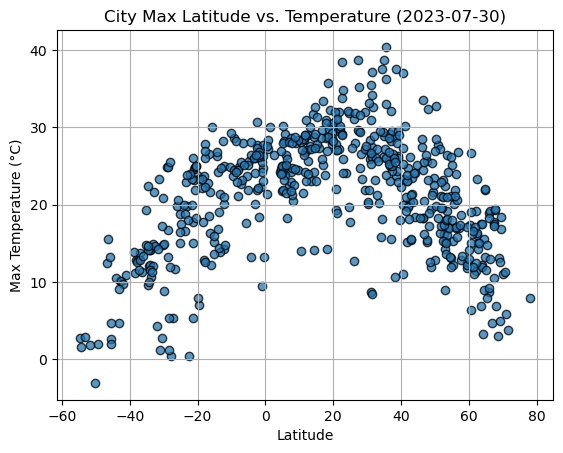

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Get the current time in seconds since the epoch
current_time = time.time()

# Convert the time to a time tuple
time_tuple = time.localtime(current_time)

# Format the current date in the format YYYY-MM-DD
current_date = time.strftime("%Y-%m-%d", time_tuple)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")  # Add the "°C" unit to the y-axis label
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

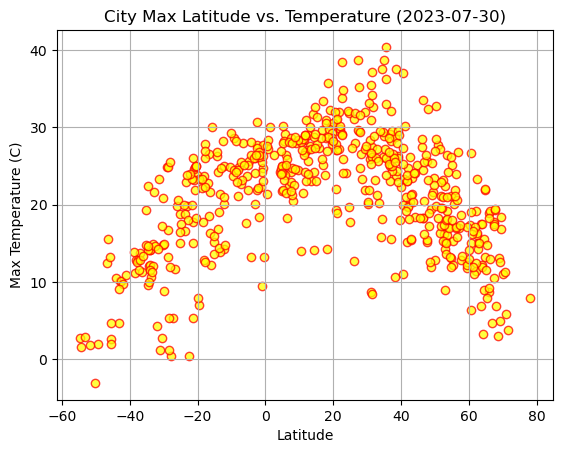

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    marker="o",
    edgecolors="red",
    facecolor = "yellow",
    alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

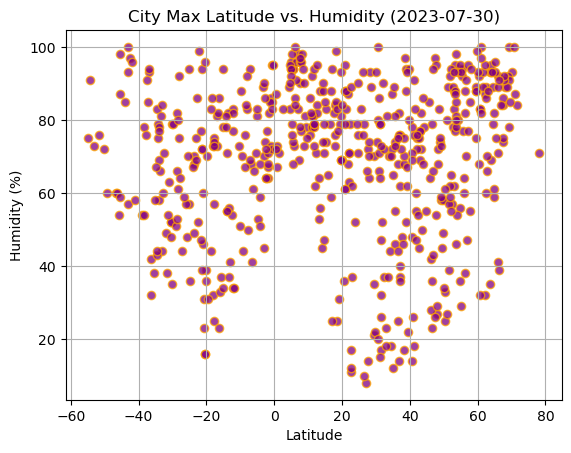

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],
            city_data_df["Humidity"],
            marker="o",
            edgecolors="orange",
            facecolor="purple",
            alpha=0.75)
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

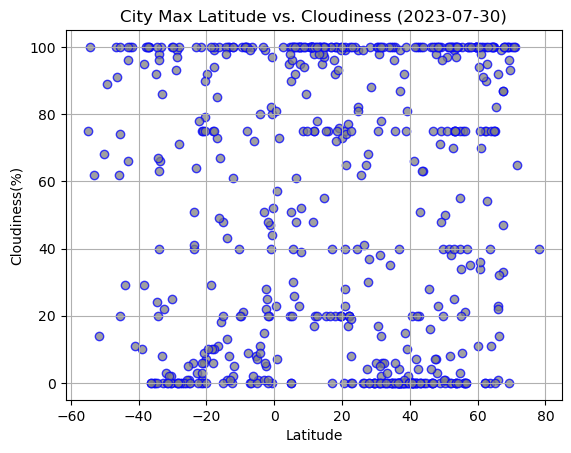

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],
            city_data_df["Cloudiness"],
            marker="o",
            edgecolors="blue",
            facecolor="grey",
            alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

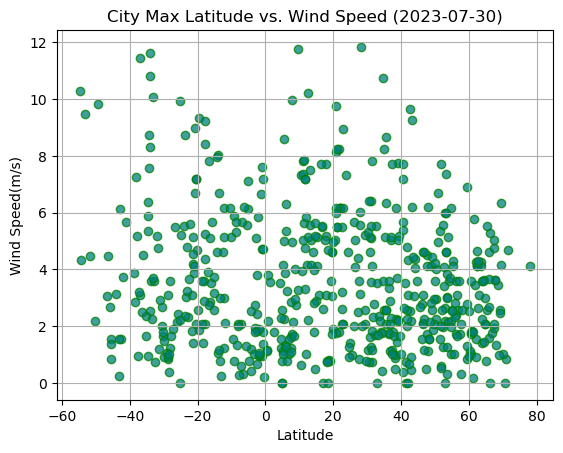

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],
            city_data_df["Wind Speed"],
            marker="o",
            edgecolors="green",
            facecolor="teal",
            alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [161]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, equation_x, equation_y):
    # Perform linear regression
    slope, intercept, r_value, _, _ = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept

    # Create the scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(np.array(x_values), regression_line, color='red')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Display the correlation coefficient on the plot
    print(f"The r-value is: {r_value}") 
    
    # Add equation of the line inside the graph
    equation_text = f"Equation: y = {slope:.2f}x + {intercept:.2f}"
    plt.text(equation_x, equation_y, equation_text, fontsize=12, ha='center', va='center', color='red')

    # Display the plot
    plt.show()



In [162]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,stanley,54.8680,-1.6985,13.17,94,40,1.03,GB,1690766512
2,oum hadjer,13.2954,19.6966,27.64,64,100,7.50,TD,1690766750
5,cambria,35.5641,-121.0808,40.41,46,100,6.34,US,1690766576
8,fort mcmurray,56.7268,-111.3810,26.77,47,40,2.57,CA,1690766392
9,haiku-pauwela,20.9219,-156.3051,31.01,61,40,9.77,US,1690766523


In [163]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,1.94,60,89,9.83,TF,1690766481
3,grytviken,-54.2811,-36.5092,1.61,91,100,4.32,GS,1690766483
4,sola,-13.8833,167.5500,24.22,71,13,8.03,VU,1690766750
6,margaret river,-33.9500,115.0667,14.20,69,63,2.53,AU,1690766492
7,ambodifotatra,-16.9833,49.8500,22.79,81,85,3.90,MG,1690766751


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6112010057209093


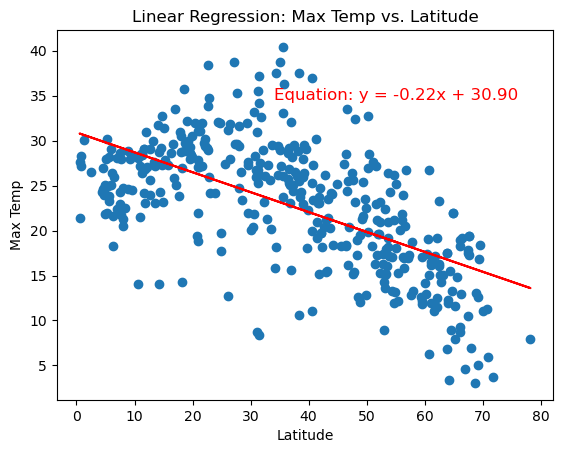

In [164]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Max Temp'].values
plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temp', 'Linear Regression: Max Temp vs. Latitude', 55, 35)

The r-value is: 0.7042135356871304


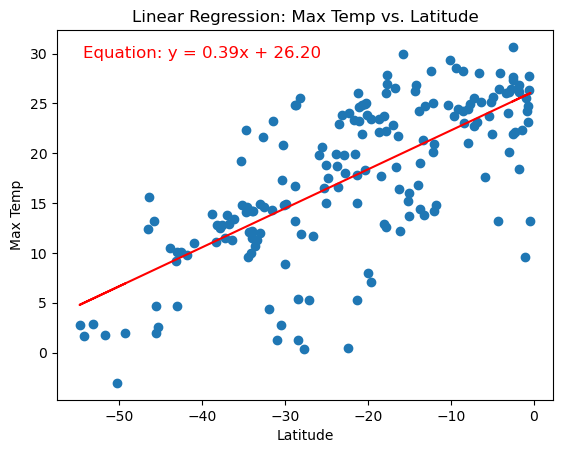

In [135]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Max Temp'].values
plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temp', 'Linear Regression: Max Temp vs. Latitude', -40, 30)




**Discussion about the linear relationship:** 
- The r-value of -0.6112 suggests a negative linear association between maximum temperature and latitude in the Northern Hemisphere.The maximum temperature decreases as we approach northward from the equator (increasing latitude). This negative connection implies that temperatures are often lower closer to the poles.
- The r-value of 0.7042 suggests a reasonably positive linear association between maximum temperature and latitude in the Southern Hemisphere. The maximum temperature rises as we approach southward from the equator (decreases latitude). This positive association implies that regions closer to the equator have greater temperatures.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.01674130052271348


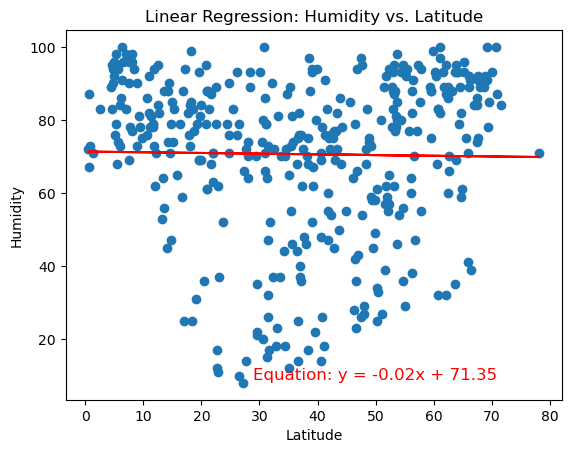

In [136]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Humidity'].values
plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity', 'Linear Regression: Humidity vs. Latitude', 50, 10)

The r-value is: 0.0024112906591352147


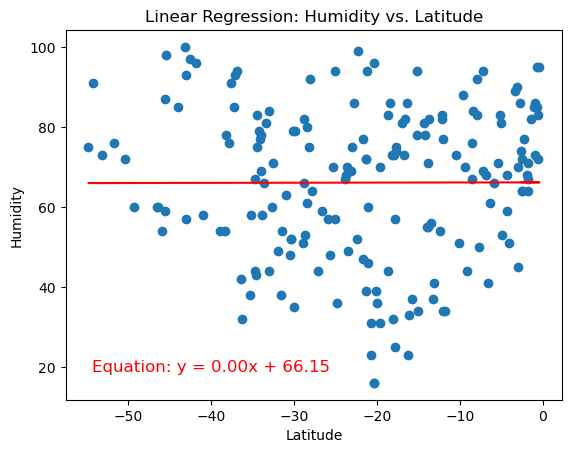

In [137]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Humidity'].values
plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity', 'Linear Regression: Humidity vs. Latitude', -40, 20)

**Discussion about the linear relationship:** 
- In the Northern Hemisphere, an r-value of -0.01674 suggests negative linear association between humidity and latitude.
- The r-value of 0.002411 suggests a slight positive linear association between humidity and latitude in the Southern Hemisphere.
- However, both correlations are near to zero, implying that latitude alone may not be a good predictor of humidity. Other elements and variables are likely to play a larger impact in influencing humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.06386246120591645


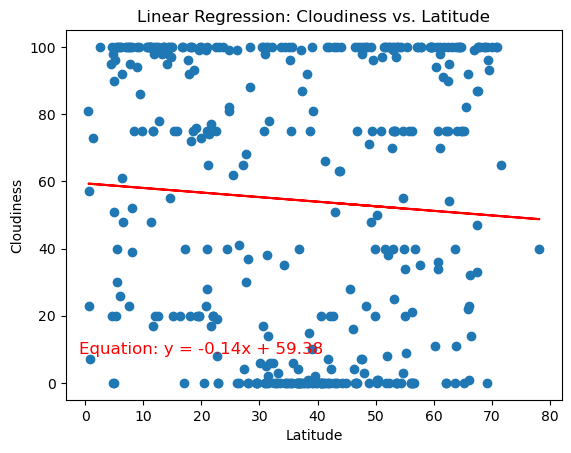

In [144]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Cloudiness'].values
plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness', 'Linear Regression: Cloudiness vs. Latitude', 20, 10)

The r-value is: -0.15519446160695816


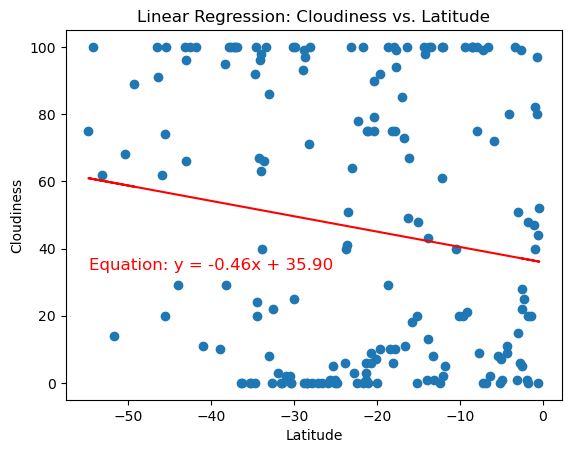

In [147]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Cloudiness'].values
plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness', 'Linear Regression: Cloudiness vs. Latitude', -40, 35)

**Discussion about the linear relationship:** 
- The r-value of -0.06386 indicates a negative linear relationship between cloudiness and latitude in the Northern Hemisphere.
- The r-value of -0.1552 indicates a negative linear relationship between cloudiness and latitude in the Southern Hemisphere.
- Both correlations are extremely close to zero, suggesting that latitude alone is not a meaningful predictor of cloudiness. There are likely other factors and variables that have a more significant influence on cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1553777732825008


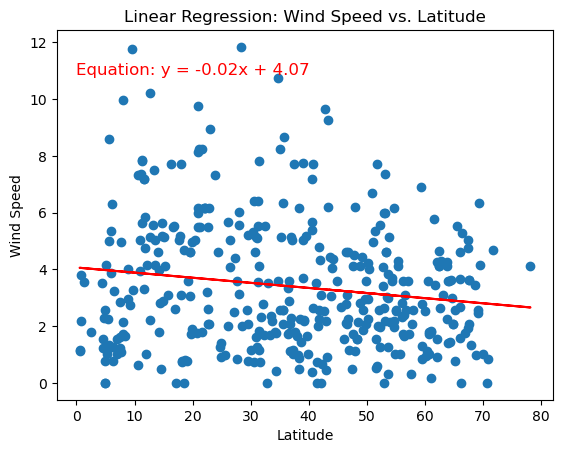

In [153]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].values
y_values = northern_hemi_df['Wind Speed'].values
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed', 'Linear Regression: Wind Speed vs. Latitude', 20, 11)

The r-value is: -0.15345346788313943


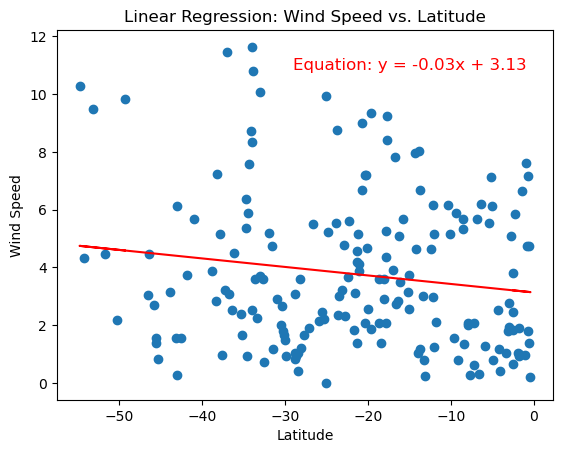

In [160]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].values
y_values = southern_hemi_df['Wind Speed'].values
plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed', 'Linear Regression: Wind Speed vs. Latitude', -15, 11)

**Discussion about the linear relationship:** 
- The r-value of -0.1554 indicates a weak negative linear relationship between wind speed and latitude in the Northern Hemisphere.
- The r-value of -0.1535 indicates a weak negative linear relationship between wind speed and latitude in the Southern Hemisphere.
- Both correlations are negative but relatively weak, suggesting that latitude alone may not be a dominant factor in determining wind speed. Other variables, such as local atmospheric conditions, topography, and weather patterns, likely play a more significant role in influencing wind speed.